<a href="https://colab.research.google.com/github/ludwigenvall/churn-prediction-dl/blob/main/02_generate_behavior_pymc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
url = "https://raw.githubusercontent.com/ludwigenvall/churn-prediction-dl/refs/heads/main/data/processed_telco.csv"
df = pd.read_csv(url)

# Preview
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Download the generative_model.py script from your GitHub repo
! wget https://raw.githubusercontent.com/ludwigenvall/churn-prediction-dl/refs/heads/main/scripts/generative_model.py

from generative_model import fit_and_simulate


--2025-06-02 12:57:48--  https://raw.githubusercontent.com/ludwigenvall/churn-prediction-dl/refs/heads/main/scripts/generative_model.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3936 (3.8K) [text/plain]
Saving to: ‘generative_model.py’

generative_model.py 100%[===================>]   3.84K  --.-KB/s    in 0s      

2025-06-02 12:57:48 (52.7 MB/s) - ‘generative_model.py’ saved [3936/3936]



In [ ]:
# Run the Bayesian generative simulation
simulated_df = fit_and_simulate(df)



Output()

In [ ]:

# Preview simulated behavior
simulated_df.head()

,customerID,Churn,logins_seq,support_seq,data_seq
0,7590-VHVEG,No,"[4, 7, 5, 6, 2, 5, 3, 7, 9, 6, 6, 3, 5, 6, 3, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[9.327181210490508, 1.4900694980397728, 2.7659..."
1,5575-GNVDE,No,"[5, 8, 2, 6, 3, 4, 3, 6, 5, 6, 4, 9, 6, 4, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4.558895251272585, 0.943177722279341, 5.21399..."
2,3668-QPYBK,Yes,"[4, 4, 2, 4, 5, 6, 4, 6, 3, 2, 5, 7, 4, 9, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7.220044094063243, 4.166260274293799, 0.50226..."
3,7795-CFOCW,No,"[2, 8, 4, 9, 4, 3, 6, 5, 3, 3, 5, 6, 7, 5, 6, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.1935490221292575, 0.11369923899453305, 0.97..."
4,9237-HQITU,Yes,"[7, 4, 6, 2, 6, 4, 6, 6, 3, 3, 6, 11, 2, 4, 4,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5.303728340297086, 2.5016550468411776, 3.3844..."


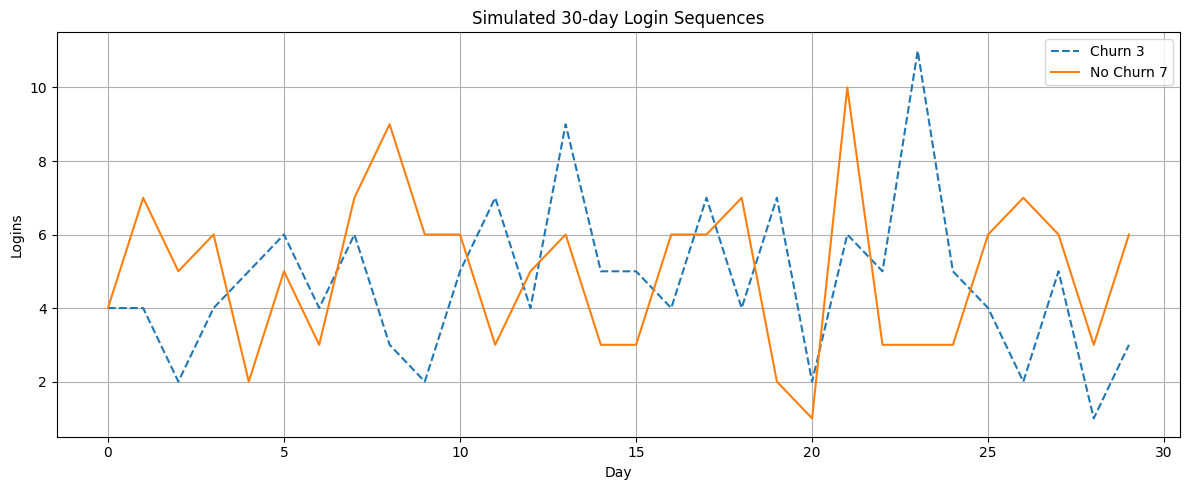

In [ ]:


# Choosing 5 customers who churn and 5 who dont churn
churned = simulated_df[simulated_df['Churn'] == 'Yes'].head(1)
not_churned = simulated_df[simulated_df['Churn'] == 'No'].head(1)

# Creating figure
plt.figure(figsize=(12, 5))

# Logins for churn customers
for i, row in churned.iterrows():
    plt.plot(row['logins_seq'], label=f"Churn {row['customerID'][:1]}", linestyle='--')

# Logins for non churn customers
for i, row in not_churned.iterrows():
    plt.plot(row['logins_seq'], label=f"No Churn {row['customerID'][:1]}")

# Figure settings
plt.title("Simulated 30-day Login Sequences")
plt.xlabel("Day")
plt.ylabel("Logins")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


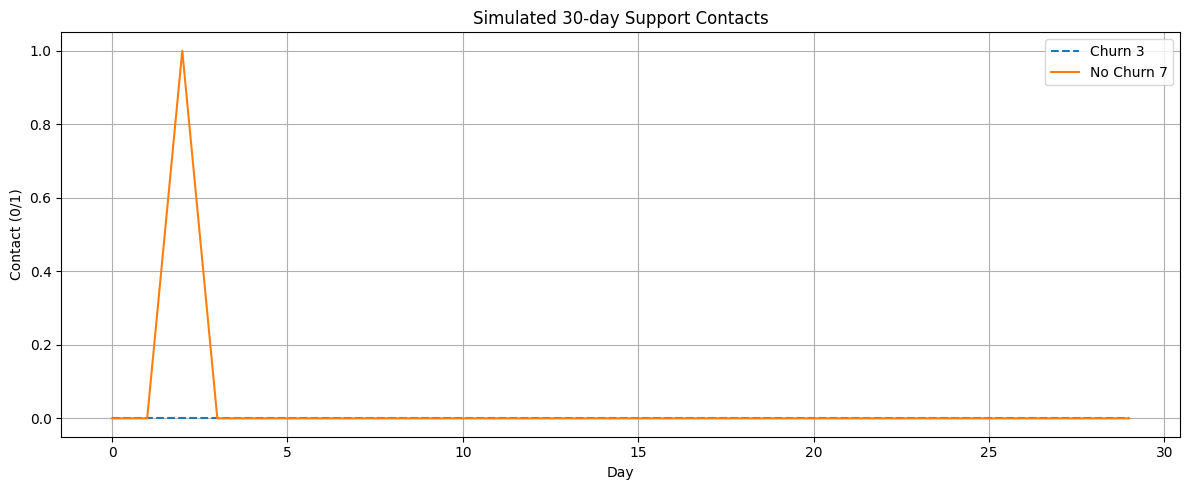

In [ ]:
# Creating figure
plt.figure(figsize=(12, 5))

#Plotting support sequence for churn customers
for i, row in churned.iterrows():
    plt.plot(row['support_seq'], label=f"Churn {row['customerID'][:1]}", linestyle='--')

#Plotting support sequence for non-churn customers
for i, row in not_churned.iterrows():
    plt.plot(row['support_seq'], label=f"No Churn {row['customerID'][:1]}")

#Figure settings
plt.title("Simulated 30-day Support Contacts")
plt.xlabel("Day")
plt.ylabel("Contact (0/1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


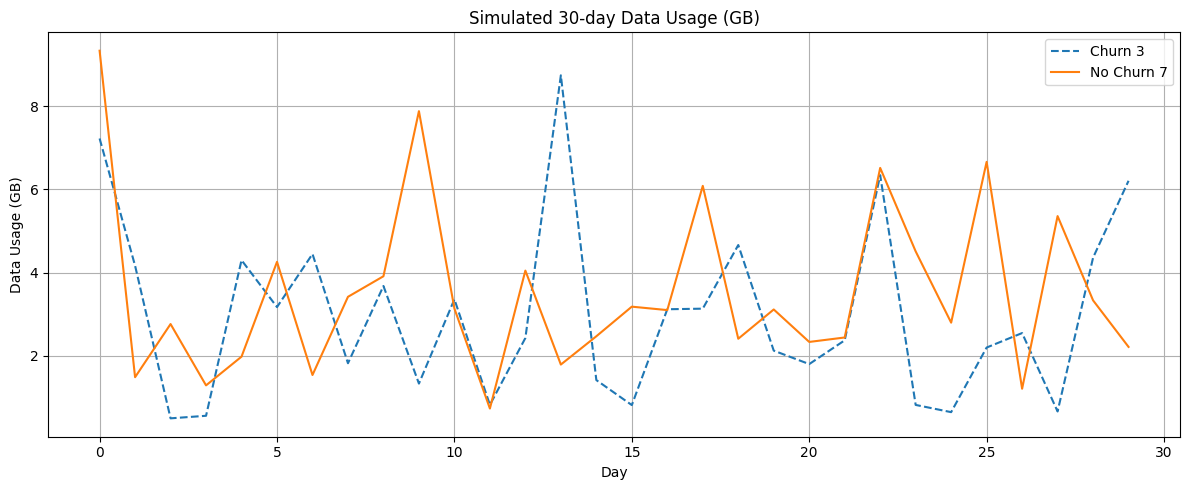

In [ ]:
plt.figure(figsize=(12, 5))

for i, row in churned.iterrows():
    plt.plot(row['data_seq'], label=f"Churn {row['customerID'][:1]}", linestyle='--')

for i, row in not_churned.iterrows():
    plt.plot(row['data_seq'], label=f"No Churn {row['customerID'][:1]}")

plt.title("Simulated 30-day Data Usage (GB)")
plt.xlabel("Day")
plt.ylabel("Data Usage (GB)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
simulated_df.to_csv("simulated_behavior.csv", index=False)
from google.colab import files
#files.download("simulated_behavior.csv")


In [ ]:
simulated_df.head(5)

,customerID,Churn,logins_seq,support_seq,data_seq
0,7590-VHVEG,No,"[4, 7, 5, 6, 2, 5, 3, 7, 9, 6, 6, 3, 5, 6, 3, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[9.327181210490508, 1.4900694980397728, 2.7659..."
1,5575-GNVDE,No,"[5, 8, 2, 6, 3, 4, 3, 6, 5, 6, 4, 9, 6, 4, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4.558895251272585, 0.943177722279341, 5.21399..."
2,3668-QPYBK,Yes,"[4, 4, 2, 4, 5, 6, 4, 6, 3, 2, 5, 7, 4, 9, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7.220044094063243, 4.166260274293799, 0.50226..."
3,7795-CFOCW,No,"[2, 8, 4, 9, 4, 3, 6, 5, 3, 3, 5, 6, 7, 5, 6, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.1935490221292575, 0.11369923899453305, 0.97..."
4,9237-HQITU,Yes,"[7, 4, 6, 2, 6, 4, 6, 6, 3, 3, 6, 11, 2, 4, 4,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5.303728340297086, 2.5016550468411776, 3.3844..."
